# Feature selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from prepare_inputs import load_my_dataset

In [3]:
gestures, labels = load_my_dataset(1, position_only=False)

Counter({0: 1097, 9: 55, 10: 48, 4: 39, 11: 33, 3: 32, 13: 32, 14: 31, 7: 26, 12: 26, 6: 20, 5: 20, 1: 12, 2: 7, 8: 7})


In [4]:
ind = labels != 0
non_zero_gestures = gestures[ind, :-1]
non_zero_gestures.shape

(388, 269)

Normalize the positions points to be relative to the palm position.

In [5]:
# Wrist and finger tip positions
position_points_x = [i for i in range(0, 21, 3)]
position_points_y = [i+1 for i in range(0, 21, 3)]
position_points_z = [i+2 for i in range(0, 21, 3)]
# Bone beginning positions
position_points_x.extend([50+11*i for i in range(20)])
position_points_y.extend([51+11*i for i in range(20)])
position_points_z.extend([52+11*i for i in range(20)])

non_zero_gestures_norm = np.copy(non_zero_gestures)
non_zero_gestures_norm[:, position_points_x] = non_zero_gestures[:, position_points_x] - non_zero_gestures[:, :1]
non_zero_gestures_norm[:, position_points_y] = non_zero_gestures[:, position_points_y] - non_zero_gestures[:, 1:2]
non_zero_gestures_norm[:, position_points_z] = non_zero_gestures[:, position_points_z] - non_zero_gestures[:, 2:3]

Drop columns that contain the bone indices and the zeros from the 0-length thumb bone. Also drop the palm position since it's included via normalisation.

In [6]:
drop_ind = [49+11*i for i in range(20)]
drop_ind.extend([0, 1, 2, 53, 54, 55])
non_zero_gestures2 = np.delete(non_zero_gestures_norm, drop_ind, 1)
non_zero_gestures2.shape

(388, 243)

In [7]:
U, S, V = np.linalg.svd(non_zero_gestures_norm)

In [8]:
sum_s = np.sum(S**2)
sum_s

45730.012261982076

<IPython.core.display.Javascript object>


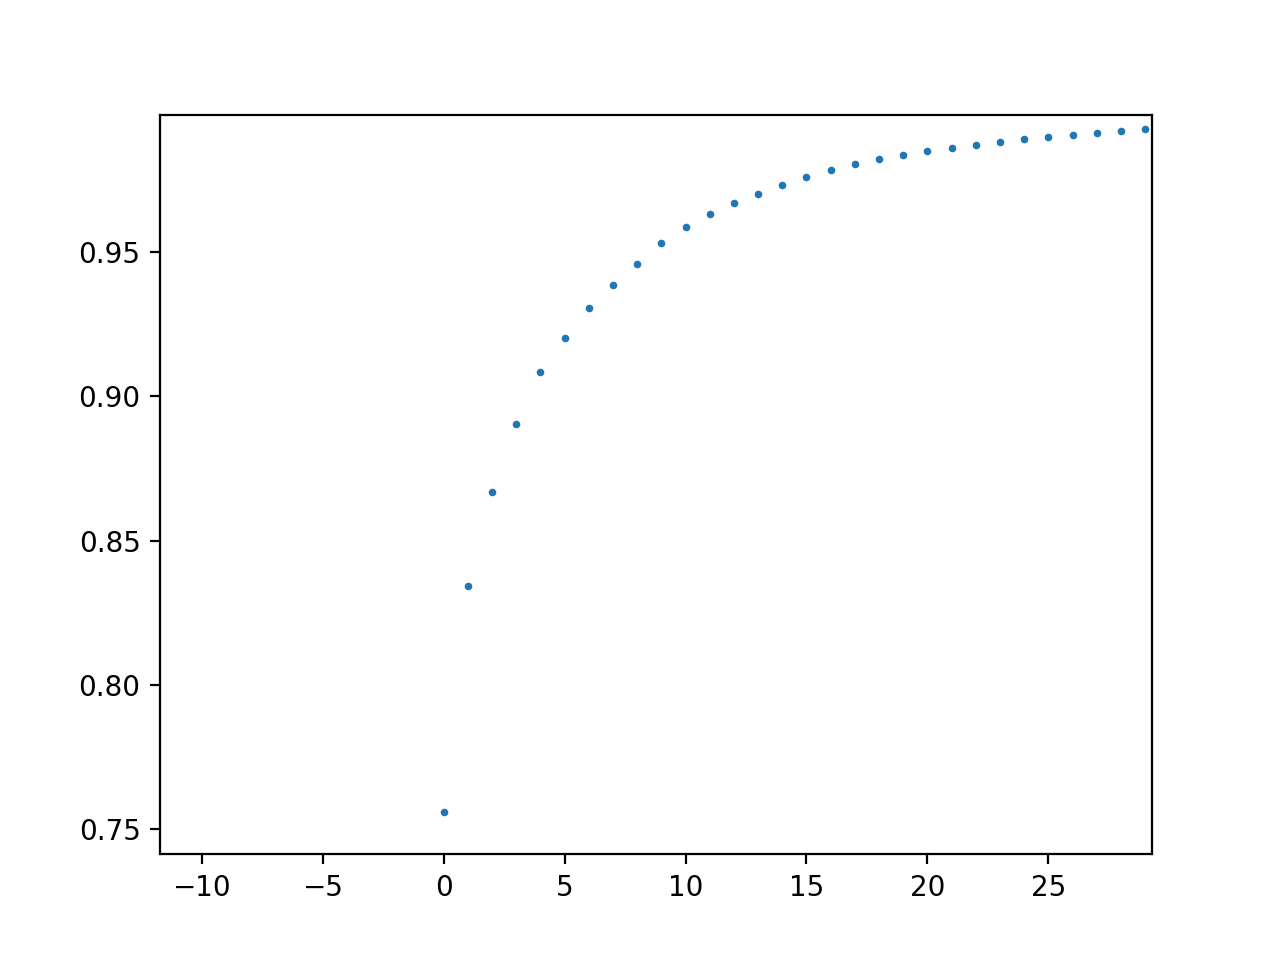

In [9]:
plt.figure()
plt.scatter(np.arange(len(S)), np.cumsum(S**2/sum_s), s=3)
plt.show()

First 8 SVD values seem to account for 95% of the variance in the data.

<IPython.core.display.Javascript object>


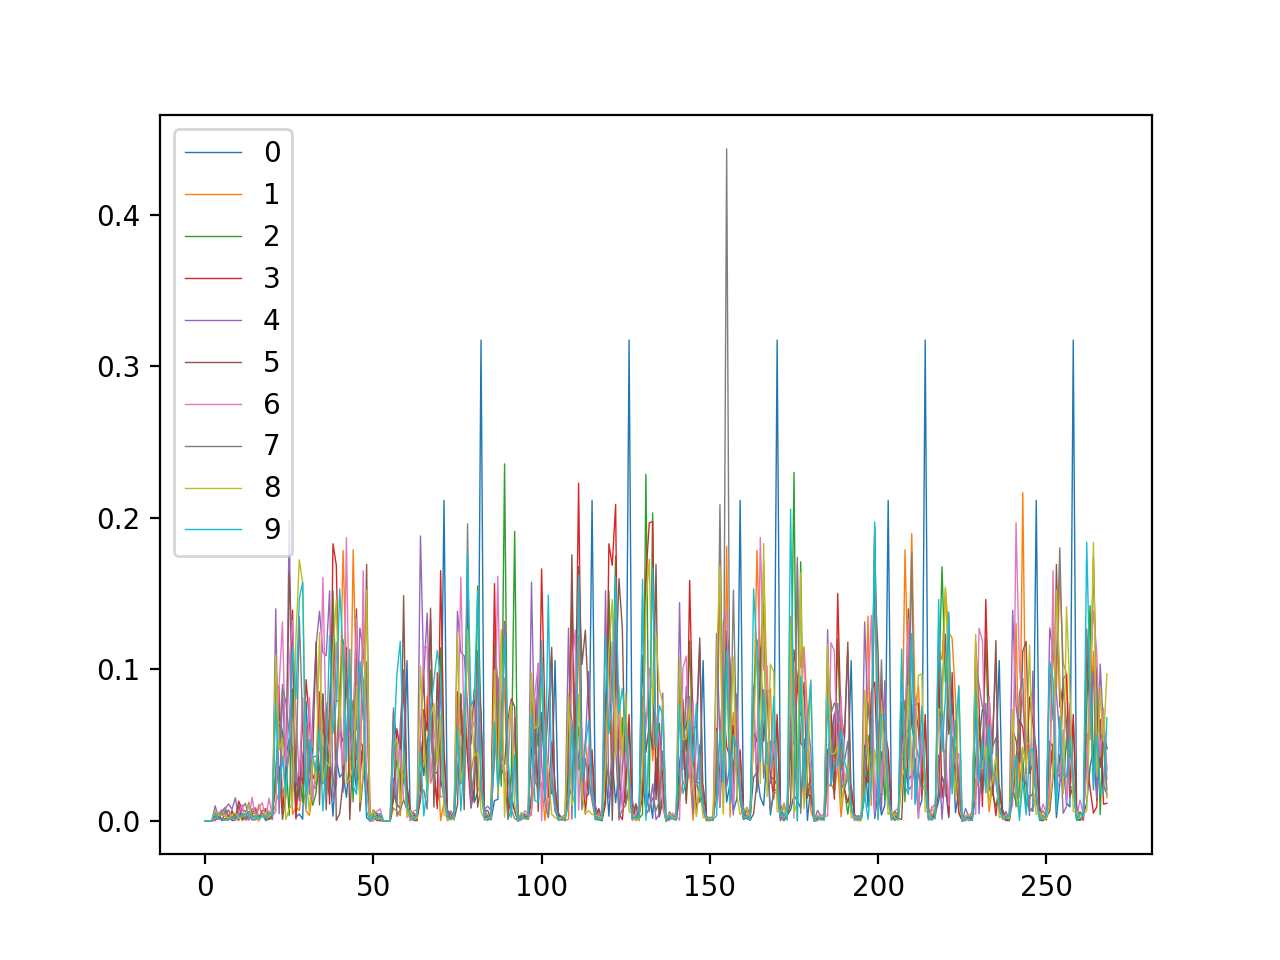

In [10]:
plt.figure()
for i in range(10):
    plt.plot(np.arange(len(V)), abs(V[i, :]), linewidth=0.5, label=i)
plt.legend()
plt.show()

In [114]:
dimension_labels = np.empty(gestures.shape[1]-1, dtype='object')
coords = np.array(['x', 'y', 'z'], dtype='object')
quaternions = np.array(['w', 'x', 'y', 'z'], dtype='object')
dimension_labels[0:3] = "Palm coordinate " + coords
dimension_labels[3:6] = "Wrist coordinate " + coords
dimension_labels[21:24] = "Palm to fingers direction " + coords
dimension_labels[24:27] = "Palm normal " + coords
dimension_labels[27:30] = "Palm velocity " + coords
dimension_labels[30:34] = "Hand rotation " + quaternions
for i in range(5):
    dimension_labels[6+3*i:9+3*i] = "Finger {} coordinate ".format(i) + coords
    dimension_labels[34+3*i:37+3*i] = "Finger {} direction ".format(i) + coords
dimension_labels[34:49]
idx = 0
for i in range(5):
    for j in range(4):
        dimension_labels[49+11*idx] = "Finger {}, bone {} type".format(i, j)
        dimension_labels[50+11*idx:53+11*idx] = "Finger {}, bone {} beginning ".format(i, j) + coords
        dimension_labels[53+11*idx:56+11*idx] = "Finger {}, bone {} direction ".format(i, j) + coords
        dimension_labels[56+11*idx:60+11*idx] = "Finger {}, bone {} rotation ".format(i, j) + quaternions
        idx += 1
        
dimension_labels

array(['Palm coordinate x', 'Palm coordinate y', 'Palm coordinate z',
       'Wrist coordinate x', 'Wrist coordinate y', 'Wrist coordinate z',
       'Finger 0 coordinate x', 'Finger 0 coordinate y',
       'Finger 0 coordinate z', 'Finger 1 coordinate x',
       'Finger 1 coordinate y', 'Finger 1 coordinate z',
       'Finger 2 coordinate x', 'Finger 2 coordinate y',
       'Finger 2 coordinate z', 'Finger 3 coordinate x',
       'Finger 3 coordinate y', 'Finger 3 coordinate z',
       'Finger 4 coordinate x', 'Finger 4 coordinate y',
       'Finger 4 coordinate z', 'Palm to fingers direction x',
       'Palm to fingers direction y', 'Palm to fingers direction z',
       'Palm normal x', 'Palm normal y', 'Palm normal z',
       'Palm velocity x', 'Palm velocity y', 'Palm velocity z',
       'Hand rotation w', 'Hand rotation x', 'Hand rotation y',
       'Hand rotation z', 'Finger 0 direction x', 'Finger 0 direction y',
       'Finger 0 direction z', 'Finger 1 direction x',
       'Fin

<IPython.core.display.Javascript object>


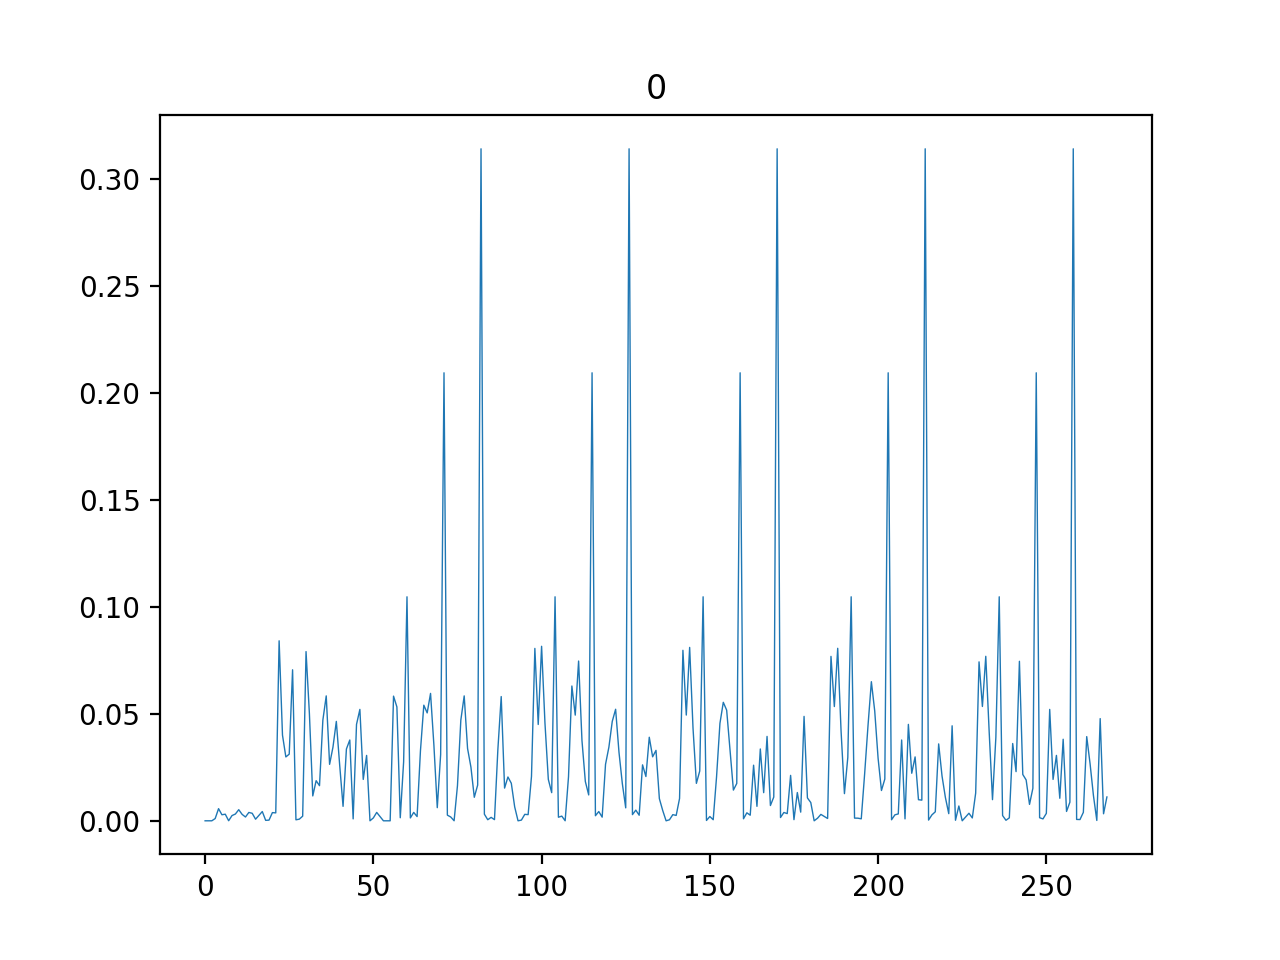

0 ['Finger 0, bone 1 type' 'Finger 0, bone 2 type' 'Finger 0, bone 3 type'
 'Finger 1, bone 1 type' 'Finger 1, bone 2 type' 'Finger 1, bone 3 type'
 'Finger 2, bone 1 type' 'Finger 2, bone 2 type' 'Finger 2, bone 3 type'
 'Finger 3, bone 1 type' 'Finger 3, bone 2 type' 'Finger 3, bone 3 type'
 'Finger 4, bone 1 type' 'Finger 4, bone 2 type' 'Finger 4, bone 3 type']


<IPython.core.display.Javascript object>


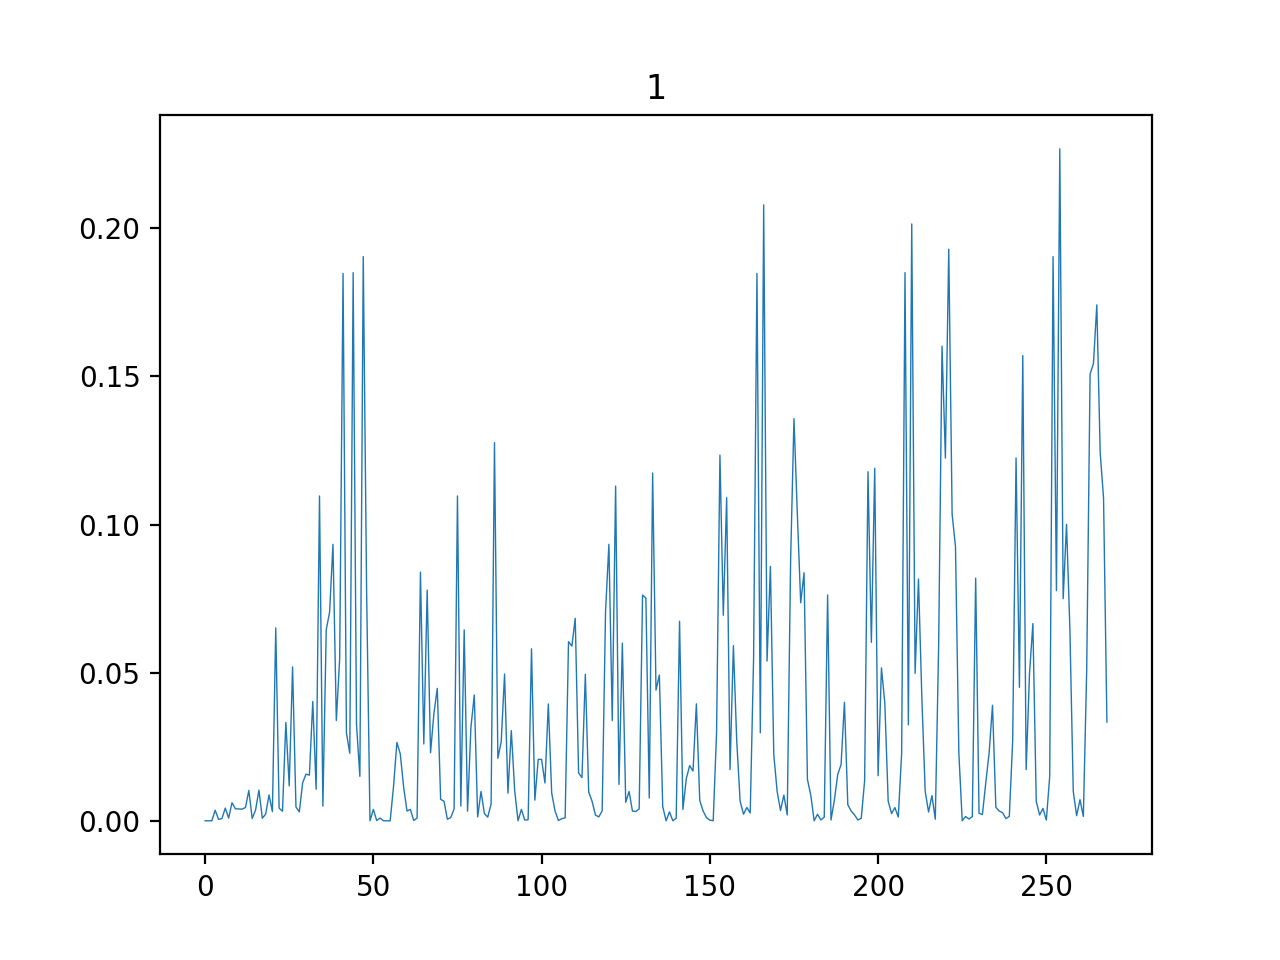

1 ['Finger 0 direction x' 'Finger 2 direction y' 'Finger 3 direction y'
 'Finger 4 direction y' 'Finger 0, bone 2 direction x'
 'Finger 0, bone 3 direction x' 'Finger 1, bone 2 rotation w'
 'Finger 1, bone 3 rotation w' 'Finger 2, bone 1 direction y'
 'Finger 2, bone 1 rotation w' 'Finger 2, bone 2 direction y'
 'Finger 2, bone 2 rotation w' 'Finger 2, bone 3 direction y'
 'Finger 2, bone 3 direction z' 'Finger 3, bone 1 direction y'
 'Finger 3, bone 1 rotation w' 'Finger 3, bone 2 direction y'
 'Finger 3, bone 2 rotation w' 'Finger 3, bone 3 direction y'
 'Finger 3, bone 3 direction z' 'Finger 3, bone 3 rotation w'
 'Finger 3, bone 3 rotation x' 'Finger 4, bone 1 direction y'
 'Finger 4, bone 1 rotation w' 'Finger 4, bone 2 direction y'
 'Finger 4, bone 2 rotation w' 'Finger 4, bone 2 rotation y'
 'Finger 4, bone 3 direction y' 'Finger 4, bone 3 direction z'
 'Finger 4, bone 3 rotation w' 'Finger 4, bone 3 rotation x'
 'Finger 4, bone 3 rotation y']


<IPython.core.display.Javascript object>


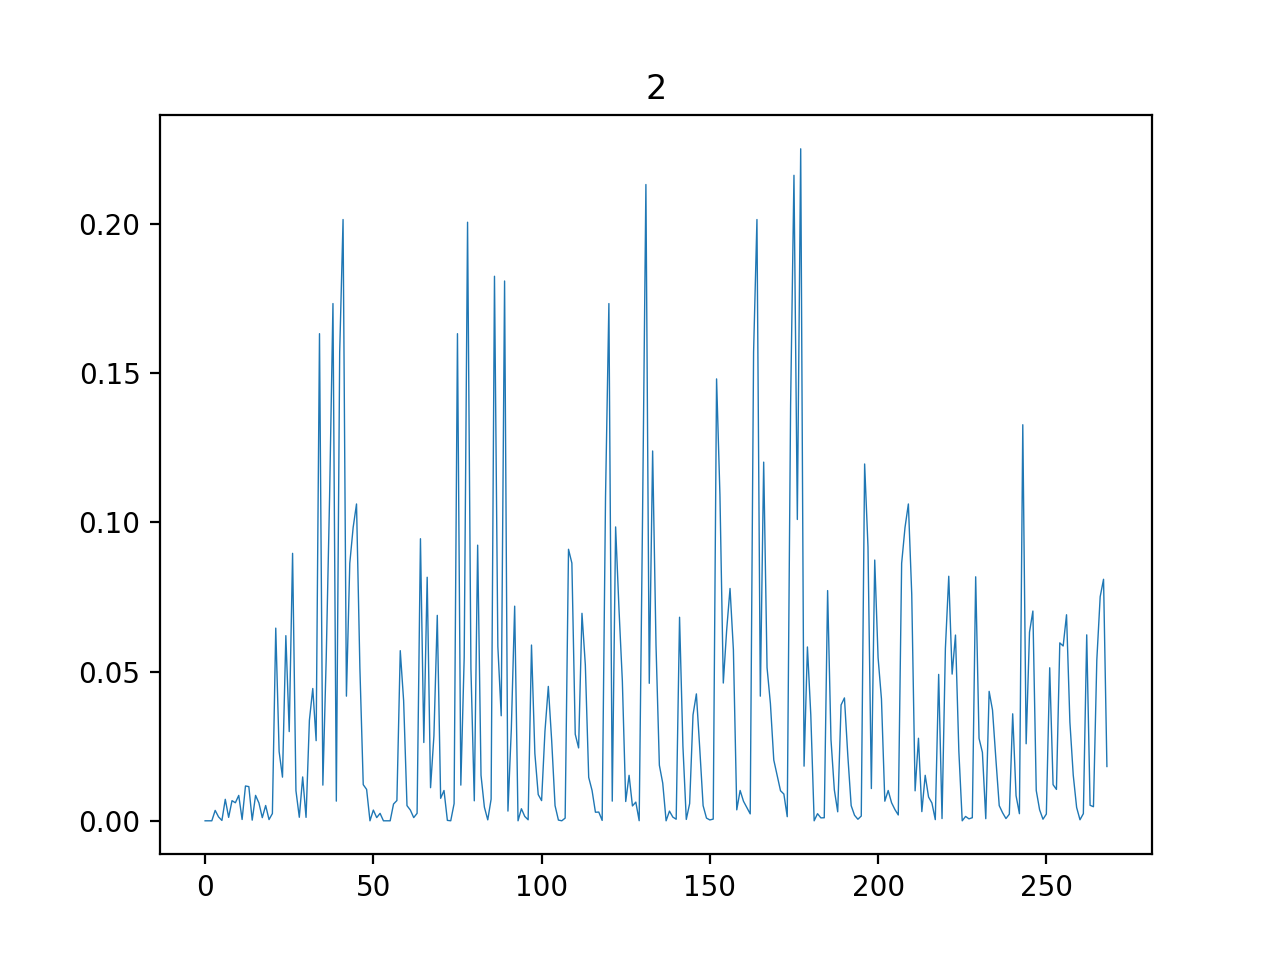

2 ['Finger 0 direction x' 'Finger 1 direction x' 'Finger 1 direction y'
 'Finger 2 direction x' 'Finger 2 direction y' 'Finger 3 direction z'
 'Finger 0, bone 2 direction x' 'Finger 0, bone 2 rotation w'
 'Finger 0, bone 3 direction x' 'Finger 0, bone 3 rotation w'
 'Finger 1, bone 2 direction x' 'Finger 1, bone 2 direction y'
 'Finger 1, bone 3 direction x' 'Finger 1, bone 3 direction y'
 'Finger 1, bone 3 rotation w' 'Finger 2, bone 1 direction x'
 'Finger 2, bone 1 direction y' 'Finger 2, bone 2 direction x'
 'Finger 2, bone 2 direction y' 'Finger 2, bone 2 rotation w'
 'Finger 2, bone 3 direction x' 'Finger 2, bone 3 direction y'
 'Finger 2, bone 3 direction z' 'Finger 2, bone 3 rotation w'
 'Finger 3, bone 1 direction x' 'Finger 3, bone 2 direction z'
 'Finger 4, bone 1 rotation w']


<IPython.core.display.Javascript object>


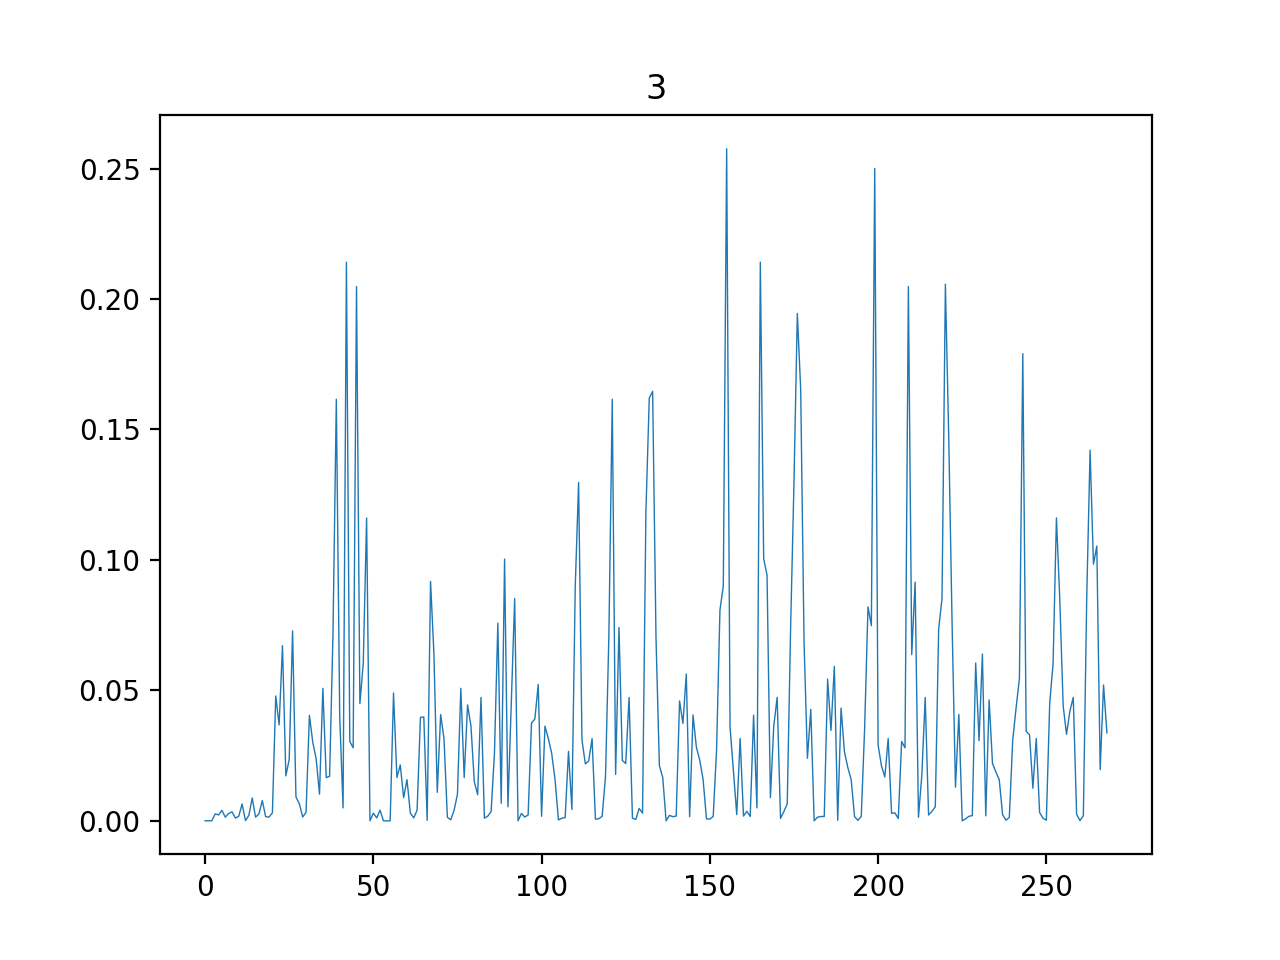

3 ['Finger 1 direction z' 'Finger 2 direction z' 'Finger 3 direction z'
 'Finger 4 direction z' 'Finger 0, bone 3 rotation w'
 'Finger 1, bone 1 rotation w' 'Finger 1, bone 2 direction z'
 'Finger 1, bone 3 direction y' 'Finger 1, bone 3 direction z'
 'Finger 1, bone 3 rotation w' 'Finger 2, bone 1 rotation w'
 'Finger 2, bone 2 direction z' 'Finger 2, bone 2 rotation w'
 'Finger 2, bone 3 direction y' 'Finger 2, bone 3 direction z'
 'Finger 2, bone 3 rotation w' 'Finger 3, bone 1 rotation w'
 'Finger 3, bone 2 direction z' 'Finger 3, bone 3 direction z'
 'Finger 3, bone 3 rotation w' 'Finger 4, bone 1 rotation w'
 'Finger 4, bone 2 direction z' 'Finger 4, bone 3 direction y'
 'Finger 4, bone 3 rotation w']


<IPython.core.display.Javascript object>


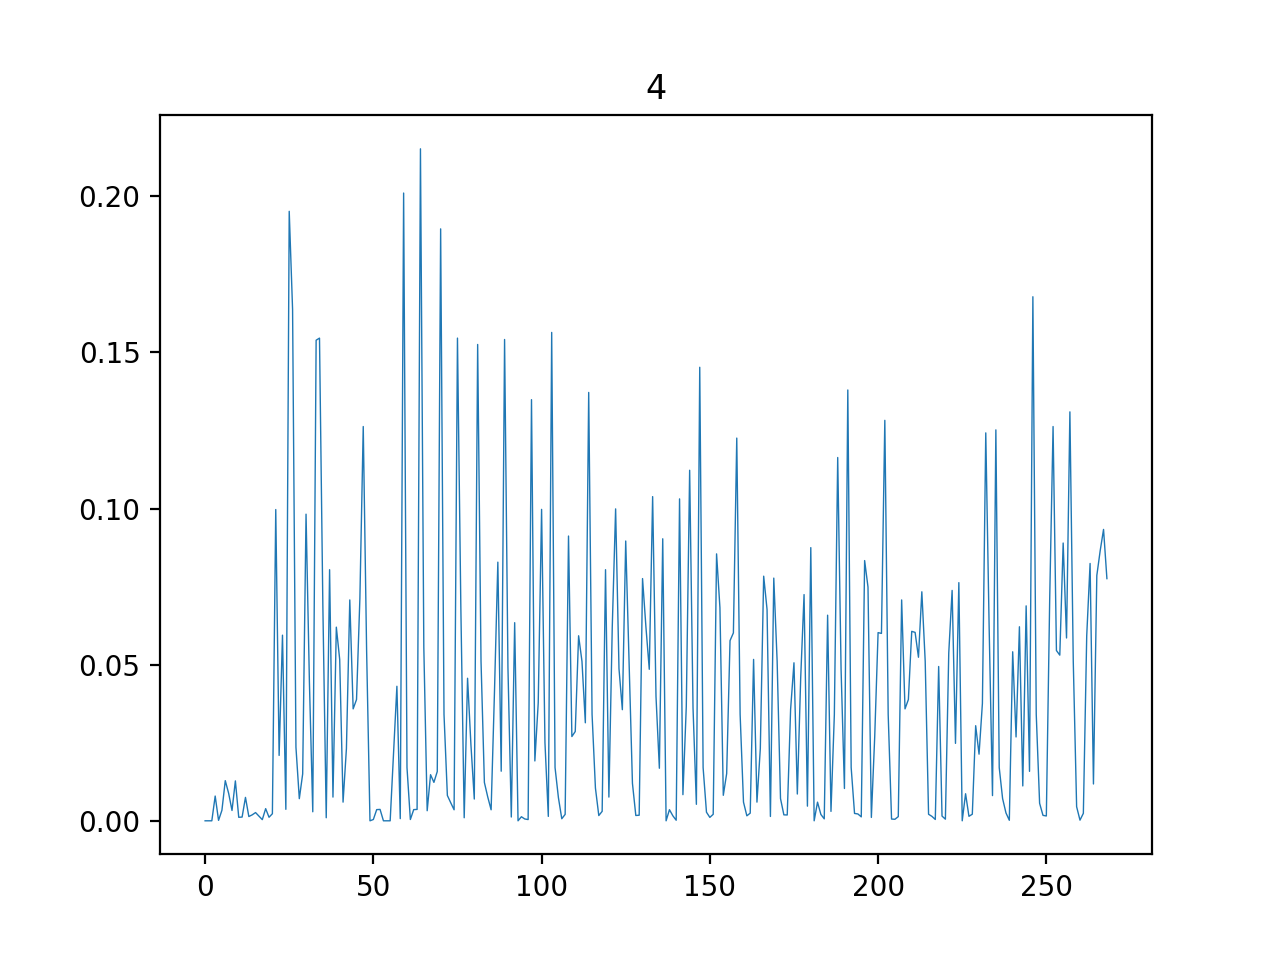

4 ['Palm normal y' 'Palm normal z' 'Hand rotation z' 'Finger 0 direction x'
 'Finger 4 direction y' 'Finger 0, bone 0 rotation z'
 'Finger 0, bone 1 direction x' 'Finger 0, bone 1 rotation z'
 'Finger 0, bone 2 direction x' 'Finger 0, bone 2 rotation z'
 'Finger 0, bone 3 rotation w' 'Finger 1, bone 0 direction x'
 'Finger 1, bone 0 rotation z' 'Finger 1, bone 1 rotation z'
 'Finger 1, bone 3 rotation w' 'Finger 2, bone 0 direction x'
 'Finger 2, bone 0 rotation w' 'Finger 2, bone 0 rotation z'
 'Finger 2, bone 1 rotation z' 'Finger 3, bone 0 rotation w'
 'Finger 3, bone 0 rotation z' 'Finger 3, bone 1 rotation z'
 'Finger 4, bone 0 rotation w' 'Finger 4, bone 0 rotation z'
 'Finger 4, bone 1 rotation z' 'Finger 4, bone 2 direction y'
 'Finger 4, bone 2 rotation z']


<IPython.core.display.Javascript object>


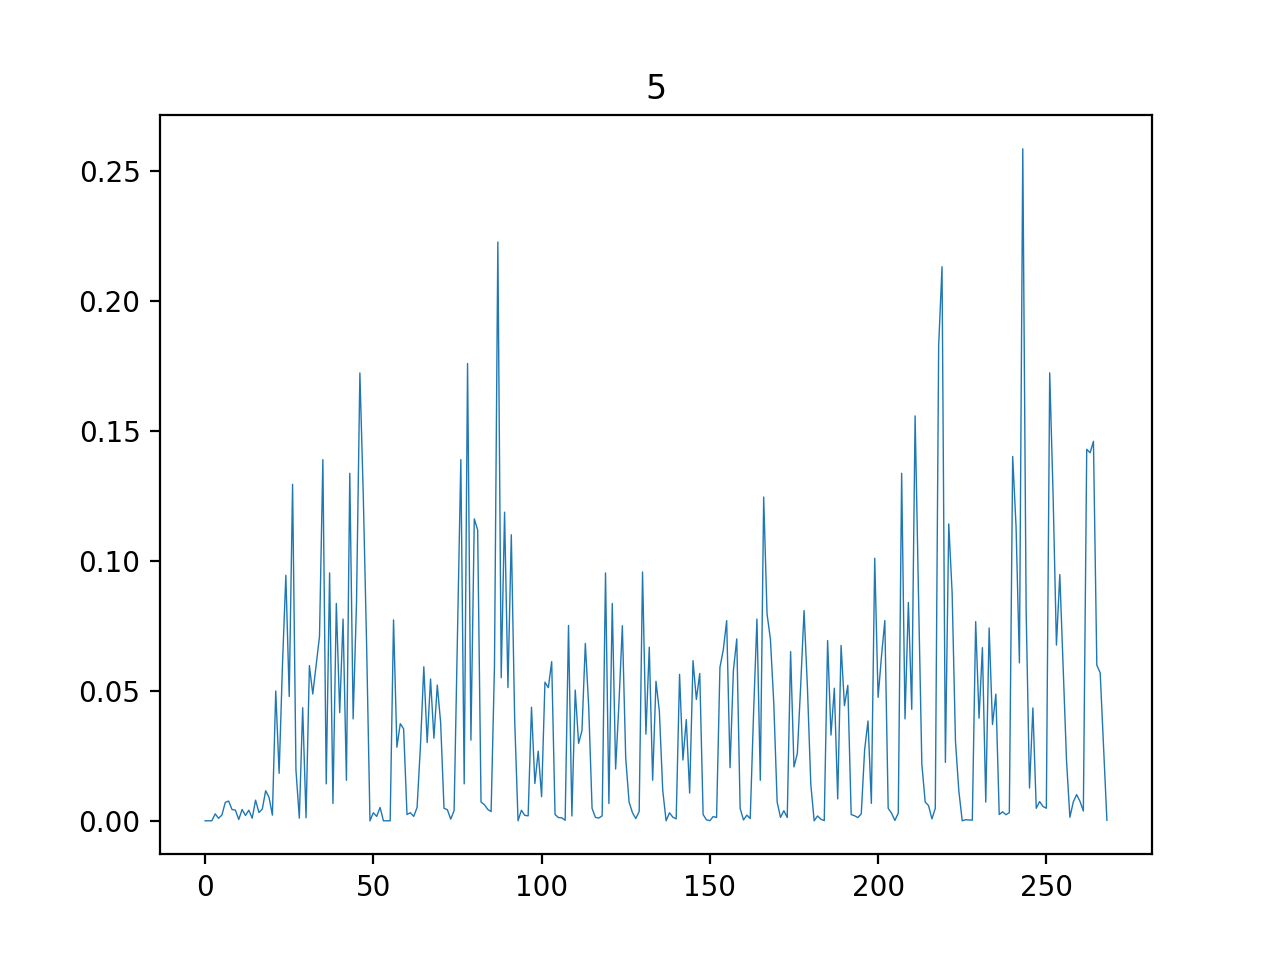

5 ['Palm normal z' 'Finger 0 direction y' 'Finger 3 direction x'
 'Finger 4 direction x' 'Finger 4 direction y'
 'Finger 0, bone 2 direction y' 'Finger 0, bone 2 rotation w'
 'Finger 0, bone 2 rotation y' 'Finger 0, bone 2 rotation z'
 'Finger 0, bone 3 direction y' 'Finger 0, bone 3 rotation w'
 'Finger 0, bone 3 rotation y' 'Finger 2, bone 2 rotation w'
 'Finger 3, bone 1 rotation w' 'Finger 3, bone 2 direction x'
 'Finger 3, bone 2 rotation x' 'Finger 3, bone 3 direction x'
 'Finger 3, bone 3 direction y' 'Finger 3, bone 3 rotation w'
 'Finger 4, bone 1 direction x' 'Finger 4, bone 1 direction y'
 'Finger 4, bone 1 rotation w' 'Finger 4, bone 2 direction x'
 'Finger 4, bone 2 direction y' 'Finger 4, bone 3 direction x'
 'Finger 4, bone 3 direction y' 'Finger 4, bone 3 direction z']


<IPython.core.display.Javascript object>


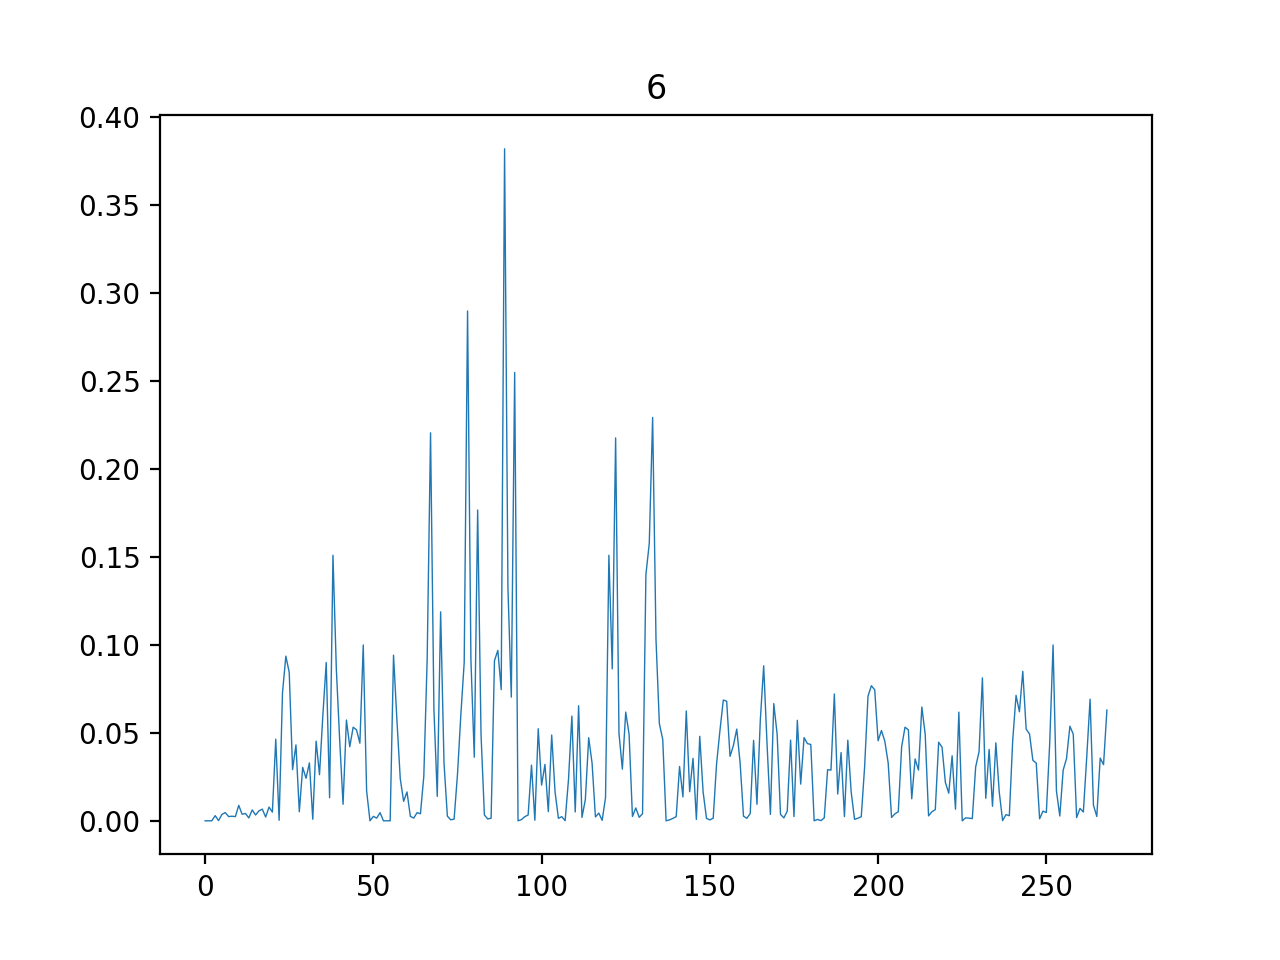

6 ['Finger 1 direction y' 'Finger 0, bone 1 rotation w'
 'Finger 0, bone 1 rotation z' 'Finger 0, bone 2 rotation w'
 'Finger 0, bone 2 rotation z' 'Finger 0, bone 3 rotation w'
 'Finger 0, bone 3 rotation x' 'Finger 0, bone 3 rotation z'
 'Finger 1, bone 2 direction y' 'Finger 1, bone 2 rotation w'
 'Finger 1, bone 3 direction y' 'Finger 1, bone 3 direction z'
 'Finger 1, bone 3 rotation w' 'Finger 1, bone 3 rotation x']


<IPython.core.display.Javascript object>


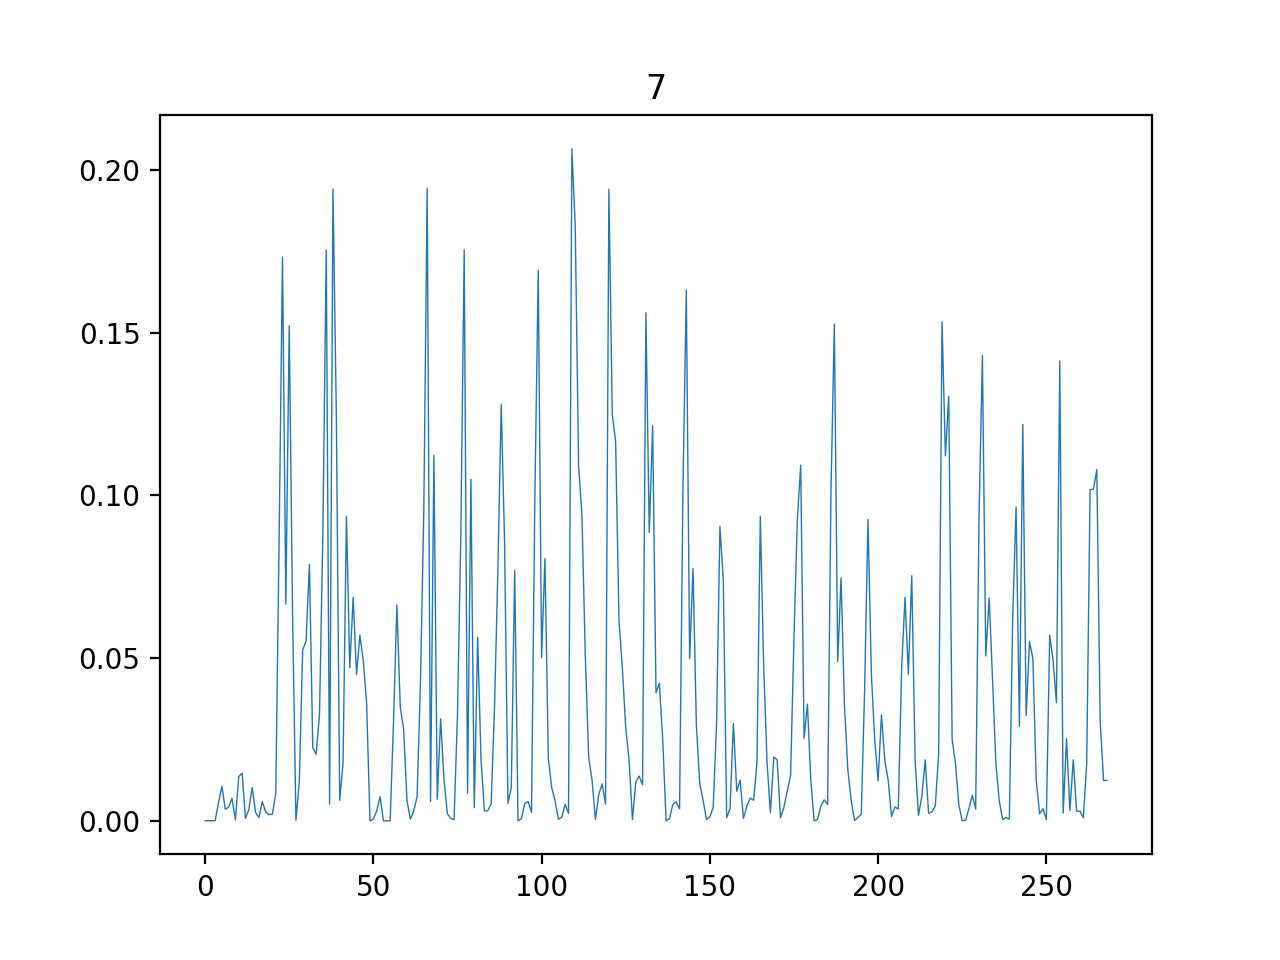

7 ['Palm to fingers direction z' 'Palm normal y' 'Finger 0 direction z'
 'Finger 1 direction y' 'Finger 1 direction z'
 'Finger 0, bone 1 direction z' 'Finger 0, bone 1 rotation x'
 'Finger 0, bone 2 direction z' 'Finger 0, bone 2 rotation x'
 'Finger 0, bone 3 direction z' 'Finger 1, bone 0 direction z'
 'Finger 1, bone 1 direction y' 'Finger 1, bone 1 direction z'
 'Finger 1, bone 1 rotation w' 'Finger 1, bone 2 direction y'
 'Finger 1, bone 2 direction z' 'Finger 1, bone 2 rotation w'
 'Finger 1, bone 3 direction y' 'Finger 1, bone 3 rotation w'
 'Finger 2, bone 0 direction y' 'Finger 2, bone 0 direction z'
 'Finger 2, bone 3 rotation w' 'Finger 3, bone 0 direction y'
 'Finger 3, bone 0 direction z' 'Finger 3, bone 3 direction y'
 'Finger 3, bone 3 direction z' 'Finger 3, bone 3 rotation w'
 'Finger 4, bone 0 direction z' 'Finger 4, bone 1 rotation w'
 'Finger 4, bone 2 rotation w' 'Finger 4, bone 3 direction y'
 'Finger 4, bone 3 direction z' 'Finger 4, bone 3 rotation w']


In [128]:
for i in range(8):
    plt.figure()
    plt.plot(np.arange(len(V)), abs(V[i, :]), linewidth=0.5)
    plt.title(i)
    plt.show()
    print(i, dimension_labels[abs(V[i, :]) >= 0.1])

The position points seem to be the less relevant in all the most important mapping vectors. 

Describe new feature space using the first 8 rows of V and map to it by multiplying each frame with V:

--- old features [ > ] x V with column vectors [ v ] = new features [ > ]

In [12]:
np.savetxt('mapping.csv', V[:10, :], delimiter=',', fmt='%f')

# Gesture length analysis

In [17]:
d1 = {0: 1097, 9: 55, 10: 48, 4: 39, 11: 33, 3: 32, 13: 32, 14: 31, 7: 26, 12: 26, 6: 20, 5: 20, 1: 12, 2: 7, 8: 7}
d2 = {0: 1373, 9: 57, 10: 53, 4: 38, 13: 36, 14: 27, 7: 26, 3: 25, 5: 20, 6: 19, 11: 15, 12: 14, 1: 13, 8: 10, 2: 9}
d3 = {0: 1002, 11: 51, 9: 45, 10: 44, 13: 36, 3: 34, 14: 33, 4: 30, 7: 29, 6: 22, 12: 22, 5: 20, 8: 13, 1: 12, 2: 10}
d4 = {0: 928, 6: 80, 10: 61, 9: 47, 13: 41, 12: 41, 14: 35, 7: 31, 11: 30, 4: 29, 3: 28, 5: 25, 8: 11, 1: 11, 2: 10}
d5 = {0: 1149, 10: 61, 11: 46, 9: 44, 13: 39, 14: 30, 4: 28, 7: 27, 3: 26, 12: 24, 5: 21, 6: 20, 2: 11, 8: 11, 1: 10}

g_frames = {}
for k in d1.keys():
    if k != 0:
        g_frames[k] = (d1[k] + d2[k] + d3[k] + d4[k] + d5[k])/5
    
g_frames

{1: 11.6,
 2: 9.4,
 3: 29.0,
 4: 32.8,
 5: 21.2,
 6: 32.2,
 7: 27.8,
 8: 10.4,
 9: 49.6,
 10: 53.4,
 11: 35.0,
 12: 25.4,
 13: 36.8,
 14: 31.2}

In [20]:
np.average(list(g_frames.values()))

28.985714285714284